# Regresión Lineal

Ecuación de Regresión:
\begin{equation}
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}


Ecuación de la Pendiente:
\begin{equation}
\hat{\beta}_1 = \frac{(X_i - \bar{X})} {(Y_i - \bar{Y})}
\end{equation}

Este ejercicio se a adaptado de "Linear Regression in Julia" por Silaparasetty, V.

[Descargar una muestra de los precios de acciones New York Stock Exchange](https://raw.githubusercontent.com/fernanvilla/data/main/nystocks.csv)

[El conjunto completo de datos de precios](https://www.kaggle.com/dgawlik/nyse)
    
[Otro Ejemplo Recomendado de Regresión Lineal](https://www.machinelearningplus.com/linear-regression-in-julia/)


In [3]:
# Import Packages
using Pkg  # Package to install new packages

# Install packages 
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("CSVFiles")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("Missings")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.build("CodecZlib")

  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Fernan\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Fernan\.j

In [1]:
# Cargar los paquetes instalados
using DataFrames
using CSV
using CSVFiles
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase
using Missings

In [2]:
# Carga el archivo CSV en un DataFrame
# para más detalles consultar -> https://juliapackages.com/p/csvfiles

using CSVFiles, DataFrames

df = DataFrame(load("./Downloads/nystocks.csv"))

println(first(df,5))

5×7 DataFrame
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume    │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64     │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 04-01-2010 │ A      │ 31.39   │ 31.3    │ 31.13   │ 31.63   │ 3815500   │
│ 2   │ 04-01-2010 │ AAP    │ 40.7    │ 40.38   │ 40.36   │ 41.04   │ 1701700   │
│ 3   │ 04-01-2010 │ AAPL   │ 213.43  │ 214.01  │ 212.38  │ 214.5   │ 123432400 │
│ 4   │ 04-01-2010 │ ABC    │ 26.29   │ 26.63   │ 26.14   │ 26.69   │ 2455900   │
│ 5   │ 04-01-2010 │ ABT    │ 54.19   │ 54.46   │ 53.92   │ 54.56   │ 10829000  │


## Exploración de los Datos

In [3]:
# Variables Disponibles
names(df)

7-element Array{String,1}:
 "date"
 "symbol"
 "open"
 "close"
 "low"
 "high"
 "volume"

In [4]:
# Presentar las primeras 5 filas
first(df,5)

5×7 DataFrame. Omitted printing of 1 columns
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 04-01-2010 │ A      │ 31.39   │ 31.3    │ 31.13   │ 31.63   │
│ 2   │ 04-01-2010 │ AAP    │ 40.7    │ 40.38   │ 40.36   │ 41.04   │
│ 3   │ 04-01-2010 │ AAPL   │ 213.43  │ 214.01  │ 212.38  │ 214.5   │
│ 4   │ 04-01-2010 │ ABC    │ 26.29   │ 26.63   │ 26.14   │ 26.69   │
│ 5   │ 04-01-2010 │ ABT    │ 54.19   │ 54.46   │ 53.92   │ 54.56   │

In [5]:
#Las últimas 5 filas
last(df,5)

5×7 DataFrame
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume   │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64    │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1   │ 06-01-2010 │ BMY    │ 25.17   │ 25.22   │ 25.07   │ 25.29   │ 15528900 │
│ 2   │ 06-01-2010 │ BSX    │ 9.07    │ 9.16    │ 8.99    │ 9.28    │ 12923000 │
│ 3   │ 06-01-2010 │ BWA    │ 35.39   │ 36.69   │ 35.3    │ 36.78   │ 4171000  │
│ 4   │ 06-01-2010 │ BXP    │ 68.23   │ 68.44   │ 68.03   │ 68.94   │ 1814900  │
│ 5   │ 06-01-2010 │ C      │ 3.56    │ 3.64    │ 3.51    │ 3.68    │ 67433800 │

In [6]:
# Algunos Indicadores Estadísticos
describe(df)

7×8 DataFrame. Omitted printing of 2 columns
│ Row │ variable │ mean      │ min        │ median   │ max        │ nunique │
│     │ Symbol   │ Union…    │ Any        │ Union…   │ Any        │ Union…  │
├─────┼──────────┼───────────┼────────────┼──────────┼────────────┼─────────┤
│ 1   │ date     │           │ 04-01-2010 │          │ 06-01-2010 │ 5       │
│ 2   │ symbol   │           │ A          │          │ ZION       │ 467     │
│ 3   │ open     │ 46.9074   │ 1.53       │ 37.07    │ 627.181    │         │
│ 4   │ close    │ 47.0407   │ 1.61       │ 37.25    │ 626.751    │         │
│ 5   │ low      │ 46.4453   │ 1.51       │ 36.74    │ 624.241    │         │
│ 6   │ high     │ 47.4197   │ 1.61       │ 37.76    │ 629.511    │         │
│ 7   │ volume   │ 7.01361e6 │ 10000      │ 3.0912e6 │ 215620200  │         │

In [7]:
# Separar por grupos
agrupar = groupby(df, :symbol)

GroupedDataFrame with 467 groups based on key: symbol
First Group (3 rows): symbol = "A"
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume  │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64   │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 04-01-2010 │ A      │ 31.39   │ 31.3    │ 31.13   │ 31.63   │ 3815500 │
│ 2   │ 05-01-2010 │ A      │ 31.21   │ 30.96   │ 30.76   │ 31.22   │ 4186000 │
│ 3   │ 06-01-2010 │ A      │ 30.85   │ 30.85   │ 30.76   │ 31.0    │ 3243700 │
⋮
Last Group (1 row): symbol = "CHTR"
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64  │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ 1   │ 05-01-2010 │ CHTR   │ 35.0    │ 35.0    │ 35.0    │ 35.0    │ 10000  │

In [8]:
#Obtener un grupo
losBXP = get(agrupar, (symbol=:"BMY",), nothing)
println(typeof(losBXP))
losBXP


SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}


3×7 SubDataFrame
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume   │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64    │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1   │ 04-01-2010 │ BMY    │ 25.41   │ 25.63   │ 25.3    │ 25.7    │ 14376100 │
│ 2   │ 05-01-2010 │ BMY    │ 25.51   │ 25.23   │ 25.01   │ 25.55   │ 16973600 │
│ 3   │ 06-01-2010 │ BMY    │ 25.17   │ 25.22   │ 25.07   │ 25.29   │ 15528900 │

In [9]:
#Obtener un grupo
losBXP = get(agrupar, (symbol=:"BXP",), nothing)
println(typeof(losBXP))
losBXP

SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}


3×7 SubDataFrame
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume  │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64   │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 04-01-2010 │ BXP    │ 67.59   │ 67.1    │ 66.53   │ 68.33   │ 1511500 │
│ 2   │ 05-01-2010 │ BXP    │ 67.24   │ 68.12   │ 66.45   │ 68.2    │ 2173700 │
│ 3   │ 06-01-2010 │ BXP    │ 68.23   │ 68.44   │ 68.03   │ 68.94   │ 1814900 │

In [10]:
losBMY = agrupar[(symbol= "BMY",)]
println(typeof(losBMY))
losBMY

SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}


3×7 SubDataFrame
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │ volume   │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │ Int64    │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1   │ 04-01-2010 │ BMY    │ 25.41   │ 25.63   │ 25.3    │ 25.7    │ 14376100 │
│ 2   │ 05-01-2010 │ BMY    │ 25.51   │ 25.23   │ 25.01   │ 25.55   │ 16973600 │
│ 3   │ 06-01-2010 │ BMY    │ 25.17   │ 25.22   │ 25.07   │ 25.29   │ 15528900 │

### Relación entre los precios de apertura vs los de cierre

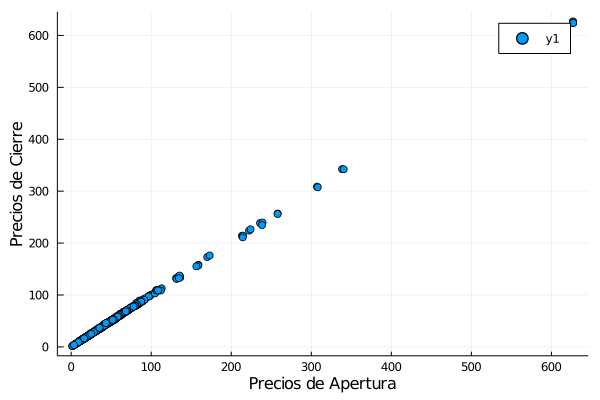

In [11]:
# Relación de los Precios de Apertura vs los de Cierre
scatter(df.open, df.close, xlabel="Precios de Apertura", ylabel="Precios de Cierre")

In [12]:
# División del Conjunto de Entrenamiento y Prueba 
# Esquema 1: Conservando el orden de los datos
# Tamaño del DataFrame 
filas, columnas = size(df)

#Se toma el 80% para Entrenamiento
nEntrenamiento = filas * 0.8
nValidacion = filas - nEntrenamiento

train = first(df, Int(nEntrenamiento))
test = last(df, Int(nValidacion))
println(size(train))
println(size(test))

(800, 7)
(200, 7)


In [13]:
# División del Conjunto de Entrenamiento y Prueba 
# Esquema 2: Aleatoriamente
# Aproximadamente el 80% para entrenamiento
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .8)

(814×7 DataFrame. Omitted printing of 1 columns
│ Row │ date       │ symbol │ open    │ close   │ low     │ high    │
│     │ String     │ String │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼────────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 04-01-2010 │ A      │ 31.39   │ 31.3    │ 31.13   │ 31.63   │
│ 2   │ 04-01-2010 │ AAP    │ 40.7    │ 40.38   │ 40.36   │ 41.04   │
│ 3   │ 04-01-2010 │ AAPL   │ 213.43  │ 214.01  │ 212.38  │ 214.5   │
│ 4   │ 04-01-2010 │ ABC    │ 26.29   │ 26.63   │ 26.14   │ 26.69   │
│ 5   │ 04-01-2010 │ ACN    │ 41.52   │ 42.07   │ 41.5    │ 42.2    │
│ 6   │ 04-01-2010 │ ADP    │ 43.54   │ 42.83   │ 42.7    │ 43.54   │
│ 7   │ 04-01-2010 │ ADS    │ 65.0    │ 65.89   │ 64.96   │ 66.0    │
│ 8   │ 04-01-2010 │ ADSK   │ 25.61   │ 25.67   │ 25.61   │ 25.83   │
│ 9   │ 04-01-2010 │ AEP    │ 35.1    │ 34.94   │ 34.8    │ 36.0    │
│ 10  │ 04-01-2010 │ AET    │ 32.06   │ 33.0    │ 31.87   │ 33.08   │
⋮
│ 804 │ 06-01-2010 │ BBBY   │ 39.13   │ 

## El Modelo de Regresión

In [14]:
using GLM
modelo = @formula(open~close)
linreg = lm(modelo, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

open ~ 1 + close

Coefficients:
────────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error        t  Pr(>|t|)  Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.161929  0.0336811     -4.81    <1e-5   -0.228041  -0.0958166
close         1.00038   0.00047325  2113.84    <1e-99   0.999448   1.00131
────────────────────────────────────────────────────────────────────────────

In [15]:
# Verificamos el valor del R cuadrado
r2(linreg)

0.9998183099258227

## Predicción

In [16]:
test_pred = predict(linreg, test);
train_pred = predict(linreg, train);

In [17]:
perf_test = df_original = DataFrame(y_original = test[!, :open], y_pred = test_pred)
perf_test.error = perf_test[!,:y_original] - perf_test[!,:y_pred]  
perf_test.error_sq = perf_test.error.*perf_test.error;

In [18]:
perf_train = df_original = DataFrame(y_original = train[!, :open], y_pred = train_pred)
perf_train.error = perf_train[!,:y_original] - perf_train[!,:y_pred]  
perf_train.error_sq = perf_train.error .* perf_train.error;

### Funciones de Pérdida

In [19]:
# Calcular la Función de Pérdida o Riesgo Total

# Función de MAPE
function mape(perf_df)
    mape = mean(abs.(perf_df.error ./ perf_df.y_original))
    return mape
end

#Funcion RMSE
function rmse(perf_df)
    rmse = sqrt(mean(perf_df.error .* perf_df.error))
    return rmse
end


rmse (generic function with 1 method)

In [20]:
println("Mean Absolute test error: ",mean(abs.(perf_test.error)))
println("Mean Absolute Percentage test error: ", mape(perf_test))
println("Root Mean Square Test Error: ", rmse(perf_test))
println("Mean Square Test Error: ",mean(perf_test.error_sq))

Mean Absolute test error: 0.5017023151586166
Mean Absolute Percentage test error: 0.011701124353951658
Root Mean Square Test Error: 0.7499470152740347
Mean Square Test Error: 0.5624205257184333


In [21]:
println("Mean Absolute train error: ",mean(abs.(perf_train.error)))
println("Mean Absolute Percentage train error: ", mape(perf_train))
println("Root Mean Square train Error: ", rmse(perf_train))
println("Mean Square train Error: ",mean(perf_train.error_sq))

Mean Absolute train error: 0.4845467192962157
Mean Absolute Percentage train error: 0.012227805323710275
Root Mean Square train Error: 0.7201515657678202
Mean Square train Error: 0.5186182776778432
